In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.resnet_v2 import ResNet50V2


In [2]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
"""import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=700)])
  except RuntimeError as e:
    print(e)"""

"import tensorflow as tf\ngpus = tf.config.experimental.list_physical_devices('GPU')\nif gpus:\n  try:\n    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=700)])\n  except RuntimeError as e:\n    print(e)"

In [3]:
SIZE = 75  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("E:\\MNIST\\Train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

0
E:\MNIST\Train\0\1.jpg
E:\MNIST\Train\0\1000.jpg
E:\MNIST\Train\0\1015.jpg
E:\MNIST\Train\0\1018.jpg
E:\MNIST\Train\0\1028.jpg
E:\MNIST\Train\0\1029.jpg
E:\MNIST\Train\0\1040.jpg
E:\MNIST\Train\0\1046.jpg
E:\MNIST\Train\0\1049.jpg
E:\MNIST\Train\0\1076.jpg
E:\MNIST\Train\0\1078.jpg
E:\MNIST\Train\0\108.jpg
E:\MNIST\Train\0\1090.jpg
E:\MNIST\Train\0\1093.jpg
E:\MNIST\Train\0\1102.jpg
E:\MNIST\Train\0\1107.jpg
E:\MNIST\Train\0\1128.jpg
E:\MNIST\Train\0\1137.jpg
E:\MNIST\Train\0\114.jpg
E:\MNIST\Train\0\1152.jpg
E:\MNIST\Train\0\1168.jpg
E:\MNIST\Train\0\1179.jpg
E:\MNIST\Train\0\118.jpg
E:\MNIST\Train\0\119.jpg
E:\MNIST\Train\0\1195.jpg
E:\MNIST\Train\0\1209.jpg
E:\MNIST\Train\0\121.jpg
E:\MNIST\Train\0\1268.jpg
E:\MNIST\Train\0\1304.jpg
E:\MNIST\Train\0\1310.jpg
E:\MNIST\Train\0\1346.jpg
E:\MNIST\Train\0\1349.jpg
E:\MNIST\Train\0\1359.jpg
E:\MNIST\Train\0\1363.jpg
E:\MNIST\Train\0\1367.jpg
E:\MNIST\Train\0\1368.jpg
E:\MNIST\Train\0\1371.jpg
E:\MNIST\Train\0\1372.jpg
E:\MNIST\Train\0\1

E:\MNIST\Train\0\4108.jpg
E:\MNIST\Train\0\4115.jpg
E:\MNIST\Train\0\4123.jpg
E:\MNIST\Train\0\4142.jpg
E:\MNIST\Train\0\4145.jpg
E:\MNIST\Train\0\4159.jpg
E:\MNIST\Train\0\4181.jpg
E:\MNIST\Train\0\4201.jpg
E:\MNIST\Train\0\4203.jpg
E:\MNIST\Train\0\4216.jpg
E:\MNIST\Train\0\4218.jpg
E:\MNIST\Train\0\4220.jpg
E:\MNIST\Train\0\4239.jpg
E:\MNIST\Train\0\4245.jpg
E:\MNIST\Train\0\4265.jpg
E:\MNIST\Train\0\427.jpg
E:\MNIST\Train\0\4270.jpg
E:\MNIST\Train\0\4279.jpg
E:\MNIST\Train\0\4284.jpg
E:\MNIST\Train\0\4288.jpg
E:\MNIST\Train\0\4289.jpg
E:\MNIST\Train\0\429.jpg
E:\MNIST\Train\0\4310.jpg
E:\MNIST\Train\0\4316.jpg
E:\MNIST\Train\0\4321.jpg
E:\MNIST\Train\0\4325.jpg
E:\MNIST\Train\0\4340.jpg
E:\MNIST\Train\0\4343.jpg
E:\MNIST\Train\0\4344.jpg
E:\MNIST\Train\0\4347.jpg
E:\MNIST\Train\0\435.jpg
E:\MNIST\Train\0\4356.jpg
E:\MNIST\Train\0\4374.jpg
E:\MNIST\Train\0\4389.jpg
E:\MNIST\Train\0\440.jpg
E:\MNIST\Train\0\4415.jpg
E:\MNIST\Train\0\4444.jpg
E:\MNIST\Train\0\4453.jpg
E:\MNIST\Train\0

E:\MNIST\Train\1\4014.jpg
E:\MNIST\Train\1\4029.jpg
E:\MNIST\Train\1\4049.jpg
E:\MNIST\Train\1\406.jpg
E:\MNIST\Train\1\4064.jpg
E:\MNIST\Train\1\4066.jpg
E:\MNIST\Train\1\4069.jpg
E:\MNIST\Train\1\4070.jpg
E:\MNIST\Train\1\408.jpg
E:\MNIST\Train\1\4089.jpg
E:\MNIST\Train\1\4105.jpg
E:\MNIST\Train\1\4109.jpg
E:\MNIST\Train\1\4120.jpg
E:\MNIST\Train\1\4128.jpg
E:\MNIST\Train\1\4129.jpg
E:\MNIST\Train\1\4137.jpg
E:\MNIST\Train\1\4140.jpg
E:\MNIST\Train\1\4149.jpg
E:\MNIST\Train\1\4152.jpg
E:\MNIST\Train\1\416.jpg
E:\MNIST\Train\1\4160.jpg
E:\MNIST\Train\1\4162.jpg
E:\MNIST\Train\1\4163.jpg
E:\MNIST\Train\1\4166.jpg
E:\MNIST\Train\1\4186.jpg
E:\MNIST\Train\1\4190.jpg
E:\MNIST\Train\1\4193.jpg
E:\MNIST\Train\1\4202.jpg
E:\MNIST\Train\1\4225.jpg
E:\MNIST\Train\1\4237.jpg
E:\MNIST\Train\1\4248.jpg
E:\MNIST\Train\1\4267.jpg
E:\MNIST\Train\1\4286.jpg
E:\MNIST\Train\1\4291.jpg
E:\MNIST\Train\1\4294.jpg
E:\MNIST\Train\1\4300.jpg
E:\MNIST\Train\1\4311.jpg
E:\MNIST\Train\1\4319.jpg
E:\MNIST\Train\

E:\MNIST\Train\2\664.jpg
E:\MNIST\Train\2\673.jpg
E:\MNIST\Train\2\674.jpg
E:\MNIST\Train\2\684.jpg
E:\MNIST\Train\2\688.jpg
E:\MNIST\Train\2\693.jpg
E:\MNIST\Train\2\696.jpg
E:\MNIST\Train\2\713.jpg
E:\MNIST\Train\2\714.jpg
E:\MNIST\Train\2\716.jpg
E:\MNIST\Train\2\732.jpg
E:\MNIST\Train\2\76.jpg
E:\MNIST\Train\2\774.jpg
E:\MNIST\Train\2\801.jpg
E:\MNIST\Train\2\807.jpg
E:\MNIST\Train\2\813.jpg
E:\MNIST\Train\2\814.jpg
E:\MNIST\Train\2\82.jpg
E:\MNIST\Train\2\830.jpg
E:\MNIST\Train\2\844.jpg
E:\MNIST\Train\2\854.jpg
E:\MNIST\Train\2\862.jpg
E:\MNIST\Train\2\863.jpg
E:\MNIST\Train\2\866.jpg
E:\MNIST\Train\2\873.jpg
E:\MNIST\Train\2\893.jpg
E:\MNIST\Train\2\907.jpg
E:\MNIST\Train\2\917.jpg
E:\MNIST\Train\2\931.jpg
E:\MNIST\Train\2\938.jpg
E:\MNIST\Train\2\946.jpg
E:\MNIST\Train\2\989.jpg
3
E:\MNIST\Train\3\10.jpg
E:\MNIST\Train\3\1007.jpg
E:\MNIST\Train\3\1021.jpg
E:\MNIST\Train\3\1035.jpg
E:\MNIST\Train\3\1055.jpg
E:\MNIST\Train\3\1068.jpg
E:\MNIST\Train\3\107.jpg
E:\MNIST\Train\3\1077

E:\MNIST\Train\4\1280.jpg
E:\MNIST\Train\4\1308.jpg
E:\MNIST\Train\4\131.jpg
E:\MNIST\Train\4\1345.jpg
E:\MNIST\Train\4\1373.jpg
E:\MNIST\Train\4\1379.jpg
E:\MNIST\Train\4\1380.jpg
E:\MNIST\Train\4\139.jpg
E:\MNIST\Train\4\1408.jpg
E:\MNIST\Train\4\1411.jpg
E:\MNIST\Train\4\142.jpg
E:\MNIST\Train\4\1431.jpg
E:\MNIST\Train\4\1440.jpg
E:\MNIST\Train\4\1446.jpg
E:\MNIST\Train\4\1448.jpg
E:\MNIST\Train\4\1460.jpg
E:\MNIST\Train\4\1461.jpg
E:\MNIST\Train\4\1473.jpg
E:\MNIST\Train\4\1477.jpg
E:\MNIST\Train\4\1487.jpg
E:\MNIST\Train\4\1498.jpg
E:\MNIST\Train\4\150.jpg
E:\MNIST\Train\4\1508.jpg
E:\MNIST\Train\4\1511.jpg
E:\MNIST\Train\4\1537.jpg
E:\MNIST\Train\4\1541.jpg
E:\MNIST\Train\4\1545.jpg
E:\MNIST\Train\4\1546.jpg
E:\MNIST\Train\4\1554.jpg
E:\MNIST\Train\4\1565.jpg
E:\MNIST\Train\4\1568.jpg
E:\MNIST\Train\4\1576.jpg
E:\MNIST\Train\4\1580.jpg
E:\MNIST\Train\4\1604.jpg
E:\MNIST\Train\4\1613.jpg
E:\MNIST\Train\4\1628.jpg
E:\MNIST\Train\4\163.jpg
E:\MNIST\Train\4\1630.jpg
E:\MNIST\Train\4\

E:\MNIST\Train\4\92.jpg
E:\MNIST\Train\4\926.jpg
E:\MNIST\Train\4\937.jpg
E:\MNIST\Train\4\945.jpg
E:\MNIST\Train\4\967.jpg
E:\MNIST\Train\4\987.jpg
E:\MNIST\Train\4\988.jpg
E:\MNIST\Train\4\990.jpg
E:\MNIST\Train\4\991.jpg
5
E:\MNIST\Train\5\0.jpg
E:\MNIST\Train\5\100.jpg
E:\MNIST\Train\5\1024.jpg
E:\MNIST\Train\5\1032.jpg
E:\MNIST\Train\5\1039.jpg
E:\MNIST\Train\5\1062.jpg
E:\MNIST\Train\5\1071.jpg
E:\MNIST\Train\5\1087.jpg
E:\MNIST\Train\5\1089.jpg
E:\MNIST\Train\5\11.jpg
E:\MNIST\Train\5\1104.jpg
E:\MNIST\Train\5\1109.jpg
E:\MNIST\Train\5\1111.jpg
E:\MNIST\Train\5\1135.jpg
E:\MNIST\Train\5\1162.jpg
E:\MNIST\Train\5\1206.jpg
E:\MNIST\Train\5\1210.jpg
E:\MNIST\Train\5\1222.jpg
E:\MNIST\Train\5\1245.jpg
E:\MNIST\Train\5\1263.jpg
E:\MNIST\Train\5\1265.jpg
E:\MNIST\Train\5\1276.jpg
E:\MNIST\Train\5\1278.jpg
E:\MNIST\Train\5\1283.jpg
E:\MNIST\Train\5\1285.jpg
E:\MNIST\Train\5\1288.jpg
E:\MNIST\Train\5\1298.jpg
E:\MNIST\Train\5\1311.jpg
E:\MNIST\Train\5\1313.jpg
E:\MNIST\Train\5\132.jpg
E

E:\MNIST\Train\6\1494.jpg
E:\MNIST\Train\6\1503.jpg
E:\MNIST\Train\6\1504.jpg
E:\MNIST\Train\6\1506.jpg
E:\MNIST\Train\6\151.jpg
E:\MNIST\Train\6\1515.jpg
E:\MNIST\Train\6\1520.jpg
E:\MNIST\Train\6\1536.jpg
E:\MNIST\Train\6\1538.jpg
E:\MNIST\Train\6\1540.jpg
E:\MNIST\Train\6\155.jpg
E:\MNIST\Train\6\1553.jpg
E:\MNIST\Train\6\1557.jpg
E:\MNIST\Train\6\1562.jpg
E:\MNIST\Train\6\1567.jpg
E:\MNIST\Train\6\1582.jpg
E:\MNIST\Train\6\1617.jpg
E:\MNIST\Train\6\1637.jpg
E:\MNIST\Train\6\1642.jpg
E:\MNIST\Train\6\165.jpg
E:\MNIST\Train\6\1669.jpg
E:\MNIST\Train\6\1671.jpg
E:\MNIST\Train\6\1686.jpg
E:\MNIST\Train\6\1688.jpg
E:\MNIST\Train\6\1694.jpg
E:\MNIST\Train\6\1706.jpg
E:\MNIST\Train\6\1707.jpg
E:\MNIST\Train\6\1708.jpg
E:\MNIST\Train\6\1726.jpg
E:\MNIST\Train\6\1731.jpg
E:\MNIST\Train\6\1741.jpg
E:\MNIST\Train\6\1750.jpg
E:\MNIST\Train\6\1761.jpg
E:\MNIST\Train\6\1768.jpg
E:\MNIST\Train\6\1779.jpg
E:\MNIST\Train\6\1781.jpg
E:\MNIST\Train\6\1782.jpg
E:\MNIST\Train\6\1784.jpg
E:\MNIST\Train\

E:\MNIST\Train\7\193.jpg
E:\MNIST\Train\7\1933.jpg
E:\MNIST\Train\7\1944.jpg
E:\MNIST\Train\7\1946.jpg
E:\MNIST\Train\7\1953.jpg
E:\MNIST\Train\7\1958.jpg
E:\MNIST\Train\7\196.jpg
E:\MNIST\Train\7\1975.jpg
E:\MNIST\Train\7\1982.jpg
E:\MNIST\Train\7\1983.jpg
E:\MNIST\Train\7\2007.jpg
E:\MNIST\Train\7\2014.jpg
E:\MNIST\Train\7\2018.jpg
E:\MNIST\Train\7\2024.jpg
E:\MNIST\Train\7\2027.jpg
E:\MNIST\Train\7\2048.jpg
E:\MNIST\Train\7\2054.jpg
E:\MNIST\Train\7\2055.jpg
E:\MNIST\Train\7\2064.jpg
E:\MNIST\Train\7\2090.jpg
E:\MNIST\Train\7\2095.jpg
E:\MNIST\Train\7\2102.jpg
E:\MNIST\Train\7\2108.jpg
E:\MNIST\Train\7\2115.jpg
E:\MNIST\Train\7\2118.jpg
E:\MNIST\Train\7\212.jpg
E:\MNIST\Train\7\2133.jpg
E:\MNIST\Train\7\214.jpg
E:\MNIST\Train\7\2142.jpg
E:\MNIST\Train\7\2145.jpg
E:\MNIST\Train\7\2161.jpg
E:\MNIST\Train\7\2168.jpg
E:\MNIST\Train\7\2173.jpg
E:\MNIST\Train\7\2187.jpg
E:\MNIST\Train\7\2213.jpg
E:\MNIST\Train\7\2223.jpg
E:\MNIST\Train\7\2229.jpg
E:\MNIST\Train\7\223.jpg
E:\MNIST\Train\7\

E:\MNIST\Train\8\3154.jpg
E:\MNIST\Train\8\3158.jpg
E:\MNIST\Train\8\3163.jpg
E:\MNIST\Train\8\3168.jpg
E:\MNIST\Train\8\3191.jpg
E:\MNIST\Train\8\3196.jpg
E:\MNIST\Train\8\3211.jpg
E:\MNIST\Train\8\3225.jpg
E:\MNIST\Train\8\3243.jpg
E:\MNIST\Train\8\3251.jpg
E:\MNIST\Train\8\3254.jpg
E:\MNIST\Train\8\3273.jpg
E:\MNIST\Train\8\3279.jpg
E:\MNIST\Train\8\3281.jpg
E:\MNIST\Train\8\3293.jpg
E:\MNIST\Train\8\3299.jpg
E:\MNIST\Train\8\333.jpg
E:\MNIST\Train\8\3338.jpg
E:\MNIST\Train\8\3353.jpg
E:\MNIST\Train\8\3354.jpg
E:\MNIST\Train\8\3365.jpg
E:\MNIST\Train\8\3407.jpg
E:\MNIST\Train\8\3420.jpg
E:\MNIST\Train\8\3425.jpg
E:\MNIST\Train\8\343.jpg
E:\MNIST\Train\8\3432.jpg
E:\MNIST\Train\8\3438.jpg
E:\MNIST\Train\8\3446.jpg
E:\MNIST\Train\8\3476.jpg
E:\MNIST\Train\8\348.jpg
E:\MNIST\Train\8\3480.jpg
E:\MNIST\Train\8\3482.jpg
E:\MNIST\Train\8\3489.jpg
E:\MNIST\Train\8\3493.jpg
E:\MNIST\Train\8\3495.jpg
E:\MNIST\Train\8\3497.jpg
E:\MNIST\Train\8\3499.jpg
E:\MNIST\Train\8\3501.jpg
E:\MNIST\Train\

E:\MNIST\Train\9\1623.jpg
E:\MNIST\Train\9\1632.jpg
E:\MNIST\Train\9\1643.jpg
E:\MNIST\Train\9\1659.jpg
E:\MNIST\Train\9\167.jpg
E:\MNIST\Train\9\1674.jpg
E:\MNIST\Train\9\1683.jpg
E:\MNIST\Train\9\1684.jpg
E:\MNIST\Train\9\1695.jpg
E:\MNIST\Train\9\170.jpg
E:\MNIST\Train\9\172.jpg
E:\MNIST\Train\9\1720.jpg
E:\MNIST\Train\9\1728.jpg
E:\MNIST\Train\9\1732.jpg
E:\MNIST\Train\9\1733.jpg
E:\MNIST\Train\9\1736.jpg
E:\MNIST\Train\9\1740.jpg
E:\MNIST\Train\9\1743.jpg
E:\MNIST\Train\9\1748.jpg
E:\MNIST\Train\9\1751.jpg
E:\MNIST\Train\9\1757.jpg
E:\MNIST\Train\9\176.jpg
E:\MNIST\Train\9\1794.jpg
E:\MNIST\Train\9\1811.jpg
E:\MNIST\Train\9\1820.jpg
E:\MNIST\Train\9\1826.jpg
E:\MNIST\Train\9\183.jpg
E:\MNIST\Train\9\1850.jpg
E:\MNIST\Train\9\1855.jpg
E:\MNIST\Train\9\1875.jpg
E:\MNIST\Train\9\1878.jpg
E:\MNIST\Train\9\1882.jpg
E:\MNIST\Train\9\1884.jpg
E:\MNIST\Train\9\1895.jpg
E:\MNIST\Train\9\19.jpg
E:\MNIST\Train\9\1903.jpg
E:\MNIST\Train\9\1905.jpg
E:\MNIST\Train\9\1912.jpg
E:\MNIST\Train\9\19

In [4]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [5]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("E:\\MNIST\\Test\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)

In [6]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [8]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Load model wothout classifier/fully connected layers
model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in model.layers:
	layer.trainable = False
    


In [11]:
x = Flatten()(model.output)
prediction_layer = Dense(10, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
model = Model(inputs=model.input, outputs=prediction_layer)


In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 81, 81, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 38, 38, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 40, 40, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

In [14]:
from tensorflow import keras
import time


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [15]:
time_callback = TimeHistory()
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot),callbacks=[time_callback],batch_size=32)
times = time_callback.times


Epoch 1/5
157/157 [==============================] - 50s 254ms/step - loss: 0.6817 - accuracy: 0.8588 - val_loss: 0.3726 - val_accuracy: 0.9060
Epoch 2/5
157/157 [==============================] - 36s 232ms/step - loss: 0.1577 - accuracy: 0.9596 - val_loss: 0.5994 - val_accuracy: 0.8850
Epoch 3/5
157/157 [==============================] - 36s 232ms/step - loss: 0.1188 - accuracy: 0.9682 - val_loss: 0.3643 - val_accuracy: 0.9380
Epoch 4/5
157/157 [==============================] - 36s 232ms/step - loss: 0.0716 - accuracy: 0.9818 - val_loss: 0.5741 - val_accuracy: 0.9100
Epoch 5/5
157/157 [==============================] - 37s 234ms/step - loss: 0.0381 - accuracy: 0.9870 - val_loss: 0.4733 - val_accuracy: 0.9350


In [16]:
print(times)

[49.55924606323242, 36.323527574539185, 36.455055713653564, 36.434900522232056, 36.77192401885986]


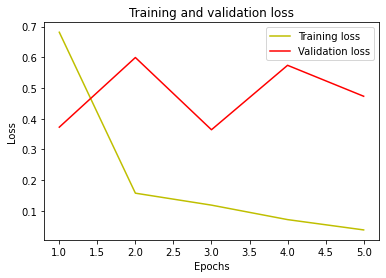

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

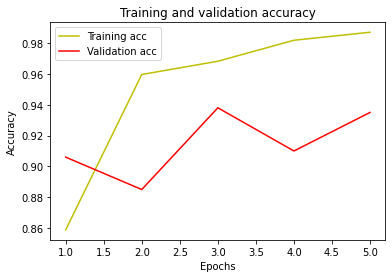

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[ 98   0   0   0   0   0   0   0   2   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   0  97   0   1   1   0   1   0   0]
 [  0   1   1  97   0   1   0   0   0   0]
 [  0   3   0   0  97   0   0   0   0   0]
 [  0   0   0   1   0  98   0   1   0   0]
 [  3   0   5   0   2   4  82   0   4   0]
 [  0   2   4   0   3   0   0  91   0   0]
 [  0   0   2   1   2   1   0   0  94   0]
 [  0   0   2   1   9   1   0   4   2  81]]


<AxesSubplot:>

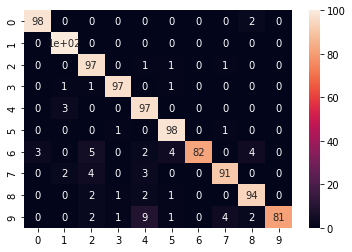

In [20]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [21]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.935


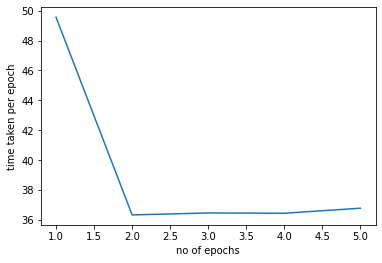

In [22]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = times


# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("time taken per epoch")
plt.show()


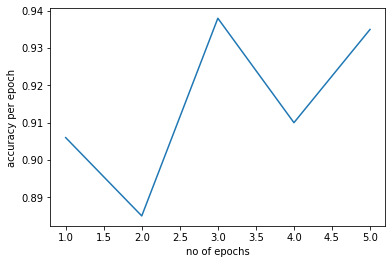

In [23]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = val_acc

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("accuracy per epoch")
plt.show()



In [24]:
print(val_acc)

[0.906000018119812, 0.8849999904632568, 0.9380000233650208, 0.9100000262260437, 0.9350000023841858]
